<a href="https://colab.research.google.com/github/DanielBarrreto/Codigos_Ramdom/blob/main/ANALISIS_GENEROS_MUSICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import csv
import numpy as np
import spacy as sp

In [ ]:
lista=np.zeros((0,6))

In [ ]:
with open('test_lyrics.csv') as file:
    csv_reader = csv.reader(file, delimiter=',')

    for row in csv_reader:
      row2=np.array(row)
      lista=np.append(lista,[row2],axis=0)


In [72]:
Header=lista[0]
Data=pd.DataFrame(lista[1:-1],columns=Header)
newData=Data[(Data["genre"]=='Pop') | (Data["genre"]=='Rock') | (Data["genre"]=='Electronic')]
ROCK=newData[newData["genre"]=="Rock"]
POP=newData[newData["genre"]=="Pop"]
ELECTRONIC=newData[newData["genre"]=="Electronic"]


In [99]:
def verbs_nouns(row):
  lista=[]
  cancion=str(row["lyrics"])
  nlp = sp.load("en_core_web_sm")
  doc = nlp(cancion)
  Verbs=[token.lemma_ for token in doc if token.pos_ == "VERB"]
  Nouns=[chunk.text for chunk in doc.noun_chunks]
  lista.extend(Verbs)
  lista.extend(Nouns)
  #lista2=pd.Series(lista)
  return lista





In [100]:
#ROCK
#6m 26s
VN_ROCK=[]
for i in range(len(ROCK)):
  ex=verbs_nouns(ROCK.iloc[i])
  VN_ROCK.extend(ex)

<Axes: title={'center': 'MOST FRECUENTLY USED WORDS IN ROCK GENRE'}, xlabel='Word', ylabel='Frecuency'>

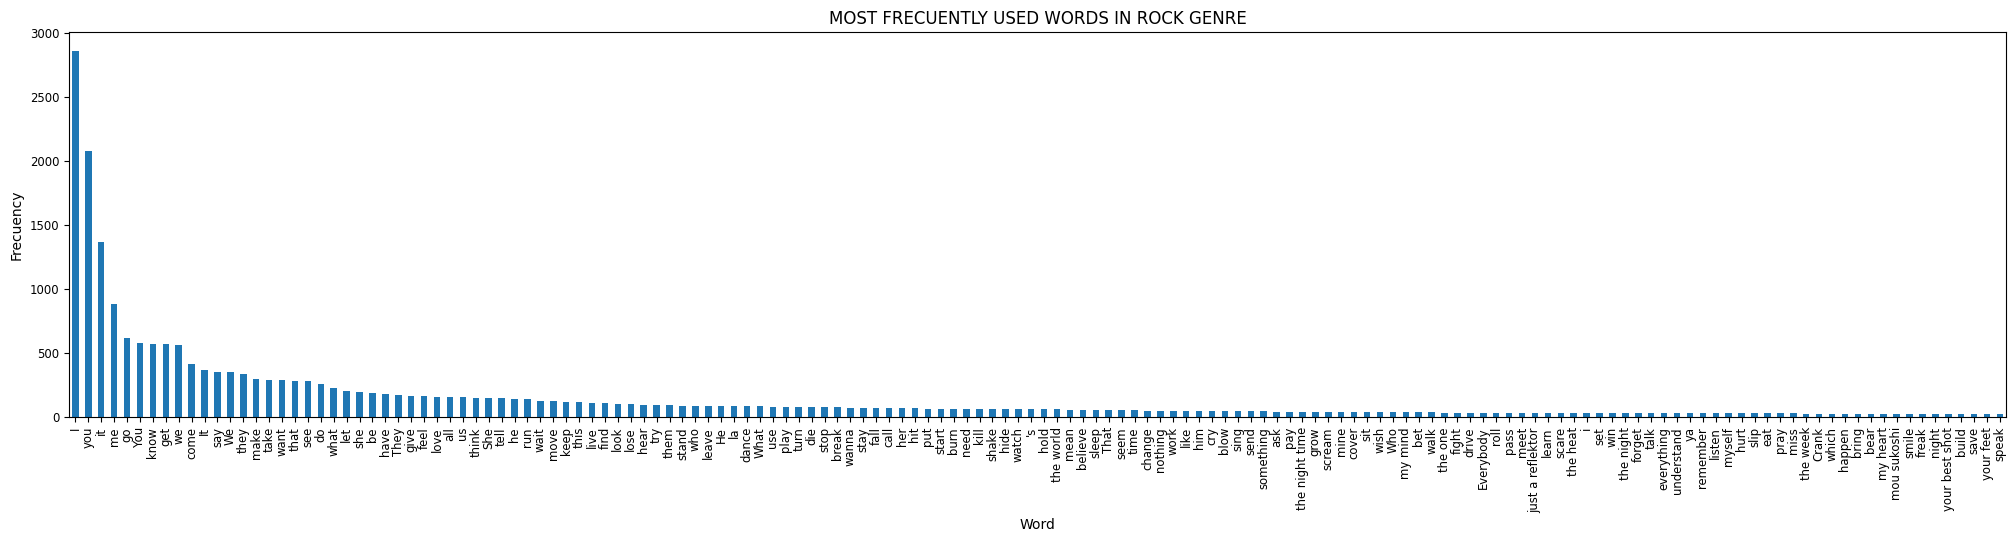

In [158]:
VN_ROCK2=pd.Series(pd.Series(VN_ROCK).value_counts())
PLOT=VN_ROCK2[0:150]
PLOT.plot(kind="bar",figsize=(25,5),fontsize="small",xlabel="Word",ylabel="Frecuency",title="MOST FRECUENTLY USED WORDS IN ROCK GENRE")



In [151]:
#POP
#4m 35s
VN_POP=[]
for i in range(len(POP)):
  ex1=verbs_nouns(POP.iloc[i])
  VN_POP.extend(ex1)

<Axes: title={'center': 'MOST FRECUENTLY USED WORDS IN POP GENRE'}, xlabel='Word', ylabel='Frecuency'>

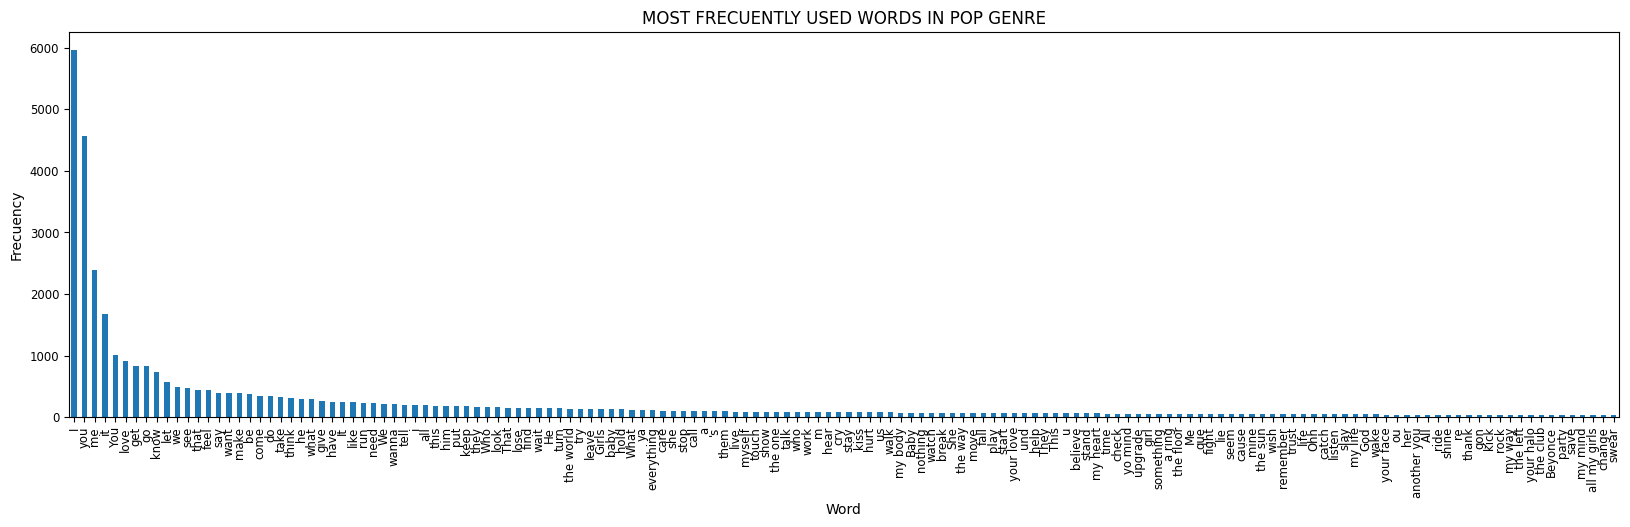

In [159]:
VN_POP2=pd.Series(pd.Series(VN_POP).value_counts())
PLOT1=VN_POP2[0:150]
PLOT1.plot(kind="bar",figsize=(20,5),fontsize="small",xlabel="Word",ylabel="Frecuency",title="MOST FRECUENTLY USED WORDS IN POP GENRE")

In [154]:
#ELECTRONIC
VN_ELECTRONIC=[]
#1m 13s
for i in range(len(ELECTRONIC)):
  ex2=verbs_nouns(ELECTRONIC.iloc[i])
  VN_ELECTRONIC.extend(ex2)

<Axes: title={'center': 'MOST FRECUENTLY USED WORDS IN ELECTRONIC GENRE'}, xlabel='Word', ylabel='Frecuency'>

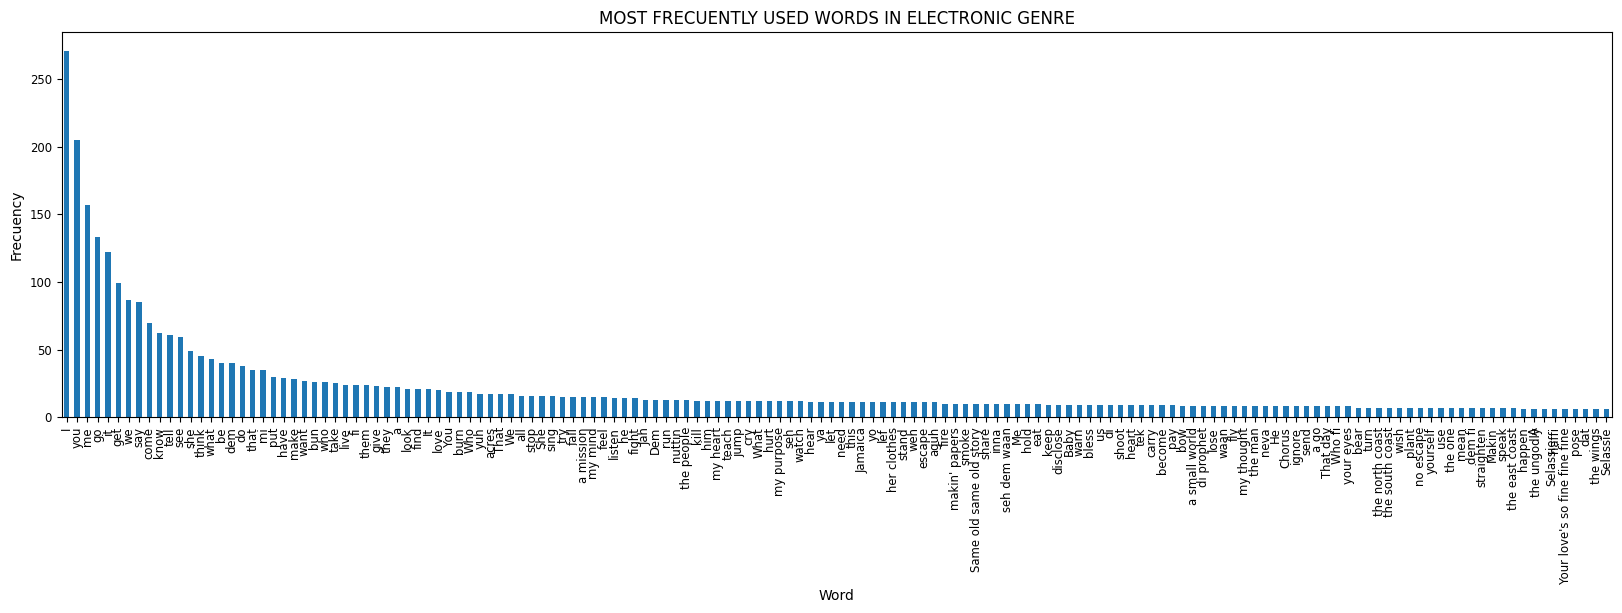

In [160]:
VN_ELECTRONIC2=pd.Series(pd.Series(VN_ELECTRONIC).value_counts())
PLOT2=VN_ELECTRONIC2[0:150]
PLOT2.plot(kind="bar",figsize=(20,5),fontsize="small",xlabel="Word",ylabel="Frecuency",title="MOST FRECUENTLY USED WORDS IN ELECTRONIC GENRE")